# PII and Anonymization Project

### <span style="color:red">Name (5 points):</span> Addison Zheng

## Scenario

**Tracy's Trendy Threads** (ticker: **TTT**) is a retail clothing store (okay, not really).  **TTT** advertises online, usually with an online social media site called **SmileyFace** (ticker: **SF**) (not really).

The marketing division wants to determine which of a set of possible offers is most attractive to members of different economic groups and has contracted your firm, **Purple Bear Intelligence** (**PBI**; privately held, no ticker symbol) to perform some of the work.

More specifically, the marketing division has contracted you to perform the tasks below using data provided to you by **TTT**.

- Build and apply a model to their data that classifies their customers into one of several social/economic groups on the basis of household income.
- Randomly assign one of a set of marketing offers to the members of the data set.
- Generate an identifier that **SF** cannot use to identify the person associated with the data, but that **TTT** can reproduce so they can re-associate exposure and response data with specific customers.
- Anonymize the data.
- Produce a new file containing the anonymized data.
- Encrypt the anonymized file and transmit the anonymized data to **SF**. (We are not actually going to do this part). 

**SF** will display the offers based upon the **TTT** data and additional data available only at **SF**.  **SF** returns exposure data (i.e., data showing who is shown each ad) back to **TTT**.  **TTT** that matches that information to response data (i.e., sales data) from their stores.  From all that, **TTT** can analyze the effectiveness of their ads.

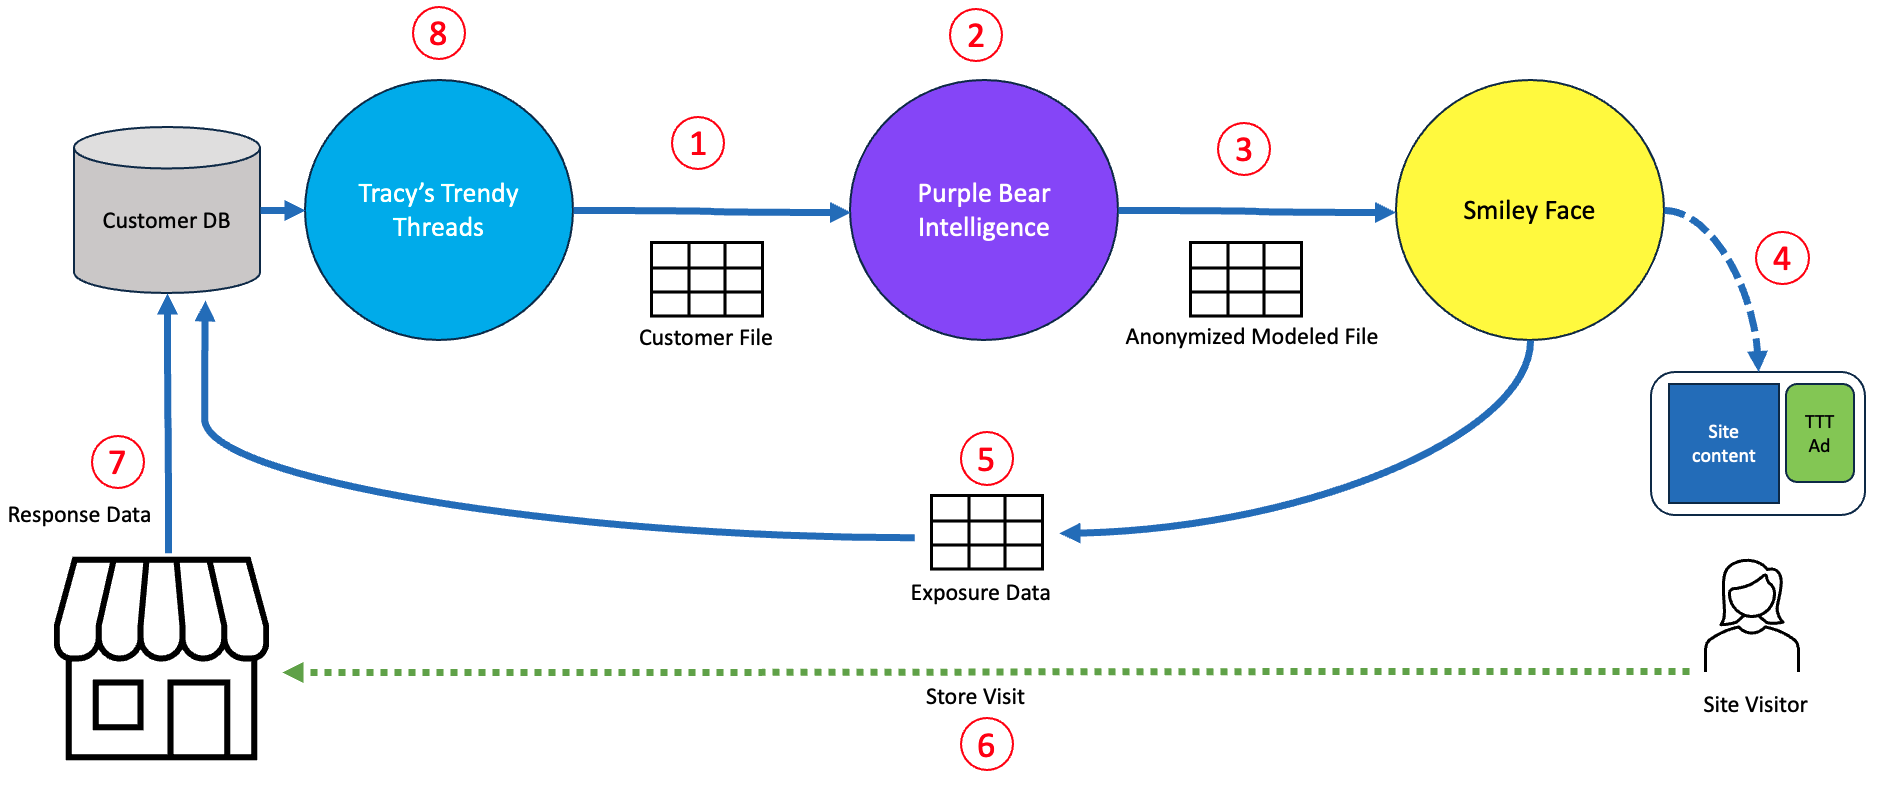

## Personally Identifiable Information (PII)

Since the definition of what constitutes PII continues to evolve and is somewhat subject to intepretation, in practice you will likely rely on guidance from your organization for legal requirements and best practices associated with handling PII.  

***For this assignment***, we will consider the following list to be the "official" list of PII items.

- Full name 
- Postal address 
- Government identifiers (e.g., Social Security Number (SSN), tax IDs, driver’s license, passport IDs)
- Financial identifiers (e.g., credit/debit card numbers, account numbers)
- Online communication identifiers (e.g., email address, social handles)
- Account logins (e.g., website login names)
- Unique identifiers derived from well-known fields
- Biometric identifiers (e.g., fingerprints, DNA, facial recognition)
- Internet protocol (IP) address
- Cookie IDs
- RFIDs


---
---
### <span style="color:red">Task 1 (15 points)</span>
**Load the TTT data.**

The data from **TTT** is in a file named "TTT_fake_customers.csv".  

Load the **TTT** data into a Pandas dataframe.  

Display some of the data to get an initial look at the row and column organization.

*As a side note, all of the data for this assignment was generated by a program.  The data does not contain any information about real people.*

In [1]:
import pandas as pd
import numpy as np
import random
import hashlib

fakeCustomer = 'TTT_fake_customers.csv'
df = pd.read_csv(fakeCustomer)
df

name                 street_address             city state  \
0         Jay Smith         98519 Brandon Turnpike      Benitezview    VA   
1    Breanna Archer                4419 Wells Dale     Mcdonaldport    AK   
2       Mary Wilson            8529 Austin Gateway        Tracyside    UT   
3     Leroy Fischer               541 Haynes Spurs      New Gregory    SD   
4       Bryan Brown      3019 Austin Camp Apt. 972       New Jeremy    CO   
..              ...                            ...              ...   ...   
995       Lori Hess  30655 Brian Causeway Apt. 761         Jasonton    KY   
996    Maria Stokes                 579 Holt Brook      Port Sydney    WV   
997  Wendy Whitaker            614 Monique Landing      Taylorburgh    MD   
998  Kathleen Jones              415 Singh Islands    South Anthony    SC   
999  Michael Daniel     166 Crawford Neck Apt. 736  Christopherberg    NV   

     zipcode          ssn     income  purchases sex   birthdate  \
0      39139  282-81-3031   11454.50   10265.78   M  2011-07-29   
1      58829  690-02-9747  128999.55   12309.28   F  2020-10-02   
2        582  841-09-2746   54282.47    4663.30   F  1938-03-01   
3      77662  600-29-3686   46709.59    5691.94   M  2001-04-12   
4      10028  631-17-7297   29754.60     970.66   M  2013-04-16   
..       ...          ...        ...        ...  ..         ...   
995    14313  880-27-1983   44142.43     579.06   F  1957-10-06   
996    98721  166-31-6456   48073.13   11809.97   F  1908-12-14   
997    46323  625-75-6782  139591.67   11906.45   F  2002-06-06   
998      859  755-34-2357  143274.88   11829.09   F  2007-01-07   
999    82297  660-44-6682    8925.10   12043.24   M  1950-08-22   

                           email   username               ip  golf  travel  \
0            scott37@example.net    qbarber  166.218.233.113     0       0   
1    tammyrichardson@example.net   nshepard     7.15.241.165     1       0   
2              ghall@example.org   mleblanc    217.165.45.19     0       1   
3         marialewis@example.org   rspencer    7.249.159.100     0       0   
4       donnamahoney@example.org   dbentley     8.39.126.172     0       1   
..                           ...        ...              ...   ...     ...   
995         erinhall@example.org   amylloyd    166.124.167.2     0       1   
996         robert61@example.com        twu    38.195.62.205     0       1   
997    taylorjeffrey@example.org    umorton      7.236.108.9     0       1   
998           pdowns@example.net  katrina84   18.148.243.116     0       0   
999          owalton@example.org    zvargas    88.12.185.239     0       1   

     fashion  outdoors  technology                              mdem  
0          1         1           0  ea2e25c82a542565ceb2b28399dff340  
1          0         0           0  e1d61e0fba8313211650b9fbce57ca68  
2          0         1           0  531495e3e23824db73891a14b41d4123  
3          0         0           0  0bcf044f2c1dd5612de0dd5393e61cda  
4          0         0           0  c6932966c40ec0cd63df82370cb3eccf  
..       ...       ...         ...                               ...  
995        0         1           0  7bfaeae9c7319287358d6fe20cf668b5  
996        0         0           0  cd369c6af681fdaa4f3874a376c4de6a  
997        0         1           0  9d1d019939aea8a3b0a18536432fd891  
998        1         0           0  a7aaad228e17cfad0c35f96c22c47cd2  
999        0         0           0  4067868a05a6868cfe7aa7bdd36fc869  

[1000 rows x 19 columns]

---
---
### <span style="color:red">Task 2 (15 points)</span> 
**Build and apply a model to their data that classifies their customers into one of several social/economic groups on the basis of household income.**

Using the `income` column, construct a new column called `economic class` the correct class based upon the table below.

This is the model that **PBI** has sold to **TTT** to help them classify their customers.

This is not a very...err...sophisticated model, but **TTT** doesn't need to know that!  

We will just use this simple model for our exercise.

| Base Income | Economic Class |
|-------------:|----------------:|
| 0 | Destitute |
| 9000 | Poor |
| 25000 | Working |
| 51000 | Middle |
| 115000 | Affluent |
| 500000 | Rich |


Display part of the customer dataframe with the new economic class column.

Display the number of customers in each economic class.

><span style="color:red">Hint:</span> Consider using the [Pandas `cut` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) to assign the appropriate Economic Class value to each row.

In [2]:
income = [0, 9000, 25000, 51000, 115000, 500000, float('inf')]
economicClass = ['Destitute', 'Poor', 'Working', 'Middle', 'Affluent', 'Rich']

df['economic class'] = pd.cut(df['income'], bins=income, labels=economicClass, right=False)
df

name                 street_address             city state  \
0         Jay Smith         98519 Brandon Turnpike      Benitezview    VA   
1    Breanna Archer                4419 Wells Dale     Mcdonaldport    AK   
2       Mary Wilson            8529 Austin Gateway        Tracyside    UT   
3     Leroy Fischer               541 Haynes Spurs      New Gregory    SD   
4       Bryan Brown      3019 Austin Camp Apt. 972       New Jeremy    CO   
..              ...                            ...              ...   ...   
995       Lori Hess  30655 Brian Causeway Apt. 761         Jasonton    KY   
996    Maria Stokes                 579 Holt Brook      Port Sydney    WV   
997  Wendy Whitaker            614 Monique Landing      Taylorburgh    MD   
998  Kathleen Jones              415 Singh Islands    South Anthony    SC   
999  Michael Daniel     166 Crawford Neck Apt. 736  Christopherberg    NV   

     zipcode          ssn     income  purchases sex   birthdate  \
0      39139  282-81-3031   11454.50   10265.78   M  2011-07-29   
1      58829  690-02-9747  128999.55   12309.28   F  2020-10-02   
2        582  841-09-2746   54282.47    4663.30   F  1938-03-01   
3      77662  600-29-3686   46709.59    5691.94   M  2001-04-12   
4      10028  631-17-7297   29754.60     970.66   M  2013-04-16   
..       ...          ...        ...        ...  ..         ...   
995    14313  880-27-1983   44142.43     579.06   F  1957-10-06   
996    98721  166-31-6456   48073.13   11809.97   F  1908-12-14   
997    46323  625-75-6782  139591.67   11906.45   F  2002-06-06   
998      859  755-34-2357  143274.88   11829.09   F  2007-01-07   
999    82297  660-44-6682    8925.10   12043.24   M  1950-08-22   

                           email   username               ip  golf  travel  \
0            scott37@example.net    qbarber  166.218.233.113     0       0   
1    tammyrichardson@example.net   nshepard     7.15.241.165     1       0   
2              ghall@example.org   mleblanc    217.165.45.19     0       1   
3         marialewis@example.org   rspencer    7.249.159.100     0       0   
4       donnamahoney@example.org   dbentley     8.39.126.172     0       1   
..                           ...        ...              ...   ...     ...   
995         erinhall@example.org   amylloyd    166.124.167.2     0       1   
996         robert61@example.com        twu    38.195.62.205     0       1   
997    taylorjeffrey@example.org    umorton      7.236.108.9     0       1   
998           pdowns@example.net  katrina84   18.148.243.116     0       0   
999          owalton@example.org    zvargas    88.12.185.239     0       1   

     fashion  outdoors  technology                              mdem  \
0          1         1           0  ea2e25c82a542565ceb2b28399dff340   
1          0         0           0  e1d61e0fba8313211650b9fbce57ca68   
2          0         1           0  531495e3e23824db73891a14b41d4123   
3          0         0           0  0bcf044f2c1dd5612de0dd5393e61cda   
4          0         0           0  c6932966c40ec0cd63df82370cb3eccf   
..       ...       ...         ...                               ...   
995        0         1           0  7bfaeae9c7319287358d6fe20cf668b5   
996        0         0           0  cd369c6af681fdaa4f3874a376c4de6a   
997        0         1           0  9d1d019939aea8a3b0a18536432fd891   
998        1         0           0  a7aaad228e17cfad0c35f96c22c47cd2   
999        0         0           0  4067868a05a6868cfe7aa7bdd36fc869   

    economic class  
0             Poor  
1         Affluent  
2           Middle  
3          Working  
4          Working  
..             ...  
995        Working  
996        Working  
997       Affluent  
998       Affluent  
999      Destitute  

[1000 rows x 20 columns]

---
---
### <span style="color:red">Task 3 (15 points)</span> 
**Randomly assign one of a set of marketing offers to the members of the data set.**

**TTT** has 4 different advertising offers that are referenced by a name.  **TTT** has already communicated the creative (i.e., the graphic or video shown with the ad) and the details of the offer deal (e.g., a discount or free shipping) to **SF**.  We at **PBI** don't know the details.  We are simply supposed to randomly assign the offers to each potential customer.

Construct a new column called `offer` and randomly assign one of the offers to each row.

Here is the table giving the offer names:

| Offer Name |
|------------|
| BlueElephant |
| YellowSeal |
| RedMouse |
| GreenLemur |
| PurpleBear |

Display the number of customers assigned each offer.

><span style="color:red">Hint:</span> Consider using the [numpy`random.choice` method](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) method to assign the offer name to each row.

In [3]:
offer = ['BlueElephant', 'YellowSeal', 'RedMouse', 'GreenLemur', 'PurpleBear']

df['offer'] = np.random.choice(offer, size=len(df))

df

name                 street_address             city state  \
0         Jay Smith         98519 Brandon Turnpike      Benitezview    VA   
1    Breanna Archer                4419 Wells Dale     Mcdonaldport    AK   
2       Mary Wilson            8529 Austin Gateway        Tracyside    UT   
3     Leroy Fischer               541 Haynes Spurs      New Gregory    SD   
4       Bryan Brown      3019 Austin Camp Apt. 972       New Jeremy    CO   
..              ...                            ...              ...   ...   
995       Lori Hess  30655 Brian Causeway Apt. 761         Jasonton    KY   
996    Maria Stokes                 579 Holt Brook      Port Sydney    WV   
997  Wendy Whitaker            614 Monique Landing      Taylorburgh    MD   
998  Kathleen Jones              415 Singh Islands    South Anthony    SC   
999  Michael Daniel     166 Crawford Neck Apt. 736  Christopherberg    NV   

     zipcode          ssn     income  purchases sex   birthdate  ...  \
0      39139  282-81-3031   11454.50   10265.78   M  2011-07-29  ...   
1      58829  690-02-9747  128999.55   12309.28   F  2020-10-02  ...   
2        582  841-09-2746   54282.47    4663.30   F  1938-03-01  ...   
3      77662  600-29-3686   46709.59    5691.94   M  2001-04-12  ...   
4      10028  631-17-7297   29754.60     970.66   M  2013-04-16  ...   
..       ...          ...        ...        ...  ..         ...  ...   
995    14313  880-27-1983   44142.43     579.06   F  1957-10-06  ...   
996    98721  166-31-6456   48073.13   11809.97   F  1908-12-14  ...   
997    46323  625-75-6782  139591.67   11906.45   F  2002-06-06  ...   
998      859  755-34-2357  143274.88   11829.09   F  2007-01-07  ...   
999    82297  660-44-6682    8925.10   12043.24   M  1950-08-22  ...   

      username               ip golf  travel  fashion  outdoors  technology  \
0      qbarber  166.218.233.113    0       0        1         1           0   
1     nshepard     7.15.241.165    1       0        0         0           0   
2     mleblanc    217.165.45.19    0       1        0         1           0   
3     rspencer    7.249.159.100    0       0        0         0           0   
4     dbentley     8.39.126.172    0       1        0         0           0   
..         ...              ...  ...     ...      ...       ...         ...   
995   amylloyd    166.124.167.2    0       1        0         1           0   
996        twu    38.195.62.205    0       1        0         0           0   
997    umorton      7.236.108.9    0       1        0         1           0   
998  katrina84   18.148.243.116    0       0        1         0           0   
999    zvargas    88.12.185.239    0       1        0         0           0   

                                 mdem economic class         offer  
0    ea2e25c82a542565ceb2b28399dff340           Poor  BlueElephant  
1    e1d61e0fba8313211650b9fbce57ca68       Affluent  BlueElephant  
2    531495e3e23824db73891a14b41d4123         Middle    GreenLemur  
3    0bcf044f2c1dd5612de0dd5393e61cda        Working    YellowSeal  
4    c6932966c40ec0cd63df82370cb3eccf        Working    PurpleBear  
..                                ...            ...           ...  
995  7bfaeae9c7319287358d6fe20cf668b5        Working      RedMouse  
996  cd369c6af681fdaa4f3874a376c4de6a        Working    PurpleBear  
997  9d1d019939aea8a3b0a18536432fd891       Affluent    GreenLemur  
998  a7aaad228e17cfad0c35f96c22c47cd2       Affluent      RedMouse  
999  4067868a05a6868cfe7aa7bdd36fc869      Destitute  BlueElephant  

[1000 rows x 21 columns]

---
---
### <span style="color:red">Task 4 (15 points)</span>
***Generate an identifier that **SF** cannot use to identify the person associated with the data, but that **TTT** can reproduce so they can re-associated exposure and response data with specific customers.***

The client, **TTT**, has already provided the salt value and it is stored in the `salt` variable below.  **TTT** also told us to use a SHA256 hash.  We have to use the same hash technique and salt so that **TT** can independently compute the same value.

Using the `email` column, construct a new column called `exposure_id` that contains a salted SHA256 hash of the email.

Display the encoded values from the `exposure_id` column from the first 5 rows of the dataframe

><span style="color:red">Hint:</span> You may want to use `apply` with a `lambda` function to call the hash routine for the entire dataframe.  By default, `apply` passes the value of a dataframe cell as the first parameter to the called function, but a `lambda` function will allow you to specify the parameter position of the cell value. 
>
>Note that the salt below is stored in `byte` format (i.e., the b"\<string\>") rather than a string.
>
>Strings (actually, `str`) are a type in Python, not just an array of bytes.  Bytes are a distinct type (`byte`) in Python.   Depending upon the encoding, characters in a string are not necessarily stored as a single byte, so storing in byte format assures an array of bytes.
>
>The `encode()` function converts a Python string type to a byte type.
>
>Make sure to `encode()` the email value from the dataframe before calling the hash routine.  The hash routines requires strings to be stored as bytes.

In [4]:
salt = b"Tracy's Trendy Threads secret salt"

df['exposure id'] = df['email'].apply(lambda email: hashlib.pbkdf2_hmac('sha256', email.encode(), salt, 1000))

df

name                 street_address             city state  \
0         Jay Smith         98519 Brandon Turnpike      Benitezview    VA   
1    Breanna Archer                4419 Wells Dale     Mcdonaldport    AK   
2       Mary Wilson            8529 Austin Gateway        Tracyside    UT   
3     Leroy Fischer               541 Haynes Spurs      New Gregory    SD   
4       Bryan Brown      3019 Austin Camp Apt. 972       New Jeremy    CO   
..              ...                            ...              ...   ...   
995       Lori Hess  30655 Brian Causeway Apt. 761         Jasonton    KY   
996    Maria Stokes                 579 Holt Brook      Port Sydney    WV   
997  Wendy Whitaker            614 Monique Landing      Taylorburgh    MD   
998  Kathleen Jones              415 Singh Islands    South Anthony    SC   
999  Michael Daniel     166 Crawford Neck Apt. 736  Christopherberg    NV   

     zipcode          ssn     income  purchases sex   birthdate  ...  \
0      39139  282-81-3031   11454.50   10265.78   M  2011-07-29  ...   
1      58829  690-02-9747  128999.55   12309.28   F  2020-10-02  ...   
2        582  841-09-2746   54282.47    4663.30   F  1938-03-01  ...   
3      77662  600-29-3686   46709.59    5691.94   M  2001-04-12  ...   
4      10028  631-17-7297   29754.60     970.66   M  2013-04-16  ...   
..       ...          ...        ...        ...  ..         ...  ...   
995    14313  880-27-1983   44142.43     579.06   F  1957-10-06  ...   
996    98721  166-31-6456   48073.13   11809.97   F  1908-12-14  ...   
997    46323  625-75-6782  139591.67   11906.45   F  2002-06-06  ...   
998      859  755-34-2357  143274.88   11829.09   F  2007-01-07  ...   
999    82297  660-44-6682    8925.10   12043.24   M  1950-08-22  ...   

                  ip golf travel  fashion  outdoors  technology  \
0    166.218.233.113    0      0        1         1           0   
1       7.15.241.165    1      0        0         0           0   
2      217.165.45.19    0      1        0         1           0   
3      7.249.159.100    0      0        0         0           0   
4       8.39.126.172    0      1        0         0           0   
..               ...  ...    ...      ...       ...         ...   
995    166.124.167.2    0      1        0         1           0   
996    38.195.62.205    0      1        0         0           0   
997      7.236.108.9    0      1        0         1           0   
998   18.148.243.116    0      0        1         0           0   
999    88.12.185.239    0      1        0         0           0   

                                 mdem  economic class         offer  \
0    ea2e25c82a542565ceb2b28399dff340            Poor  BlueElephant   
1    e1d61e0fba8313211650b9fbce57ca68        Affluent  BlueElephant   
2    531495e3e23824db73891a14b41d4123          Middle    GreenLemur   
3    0bcf044f2c1dd5612de0dd5393e61cda         Working    YellowSeal   
4    c6932966c40ec0cd63df82370cb3eccf         Working    PurpleBear   
..                                ...             ...           ...   
995  7bfaeae9c7319287358d6fe20cf668b5         Working      RedMouse   
996  cd369c6af681fdaa4f3874a376c4de6a         Working    PurpleBear   
997  9d1d019939aea8a3b0a18536432fd891        Affluent    GreenLemur   
998  a7aaad228e17cfad0c35f96c22c47cd2        Affluent      RedMouse   
999  4067868a05a6868cfe7aa7bdd36fc869       Destitute  BlueElephant   

                                           exposure id  
0    b'q\x90\x15(\xbeZu\xdc\r\xdc\xa2M[F\t/(\xe7\xf...  
1    b'\xa7}\xcc\xe7\x8c\x01a\xc8\x04J\x8aBp\x0b\x0...  
2    b'\xe0|N\x83\x9a&\xf1\x14M\x02\xda\xb8\xdc$\xc...  
3    b'\xd1\xdbNR\xe6k\x8e8M2\x16CAx\xbf\xc7\n\xf0\...  
4    b';~\xcd\xdb\xc1\xd8\x16\xd19W{\xf5\x90\n\\\xc...  
..                                                 ...  
995  b'\xbb\xb2\xc0\xa2l\xcb*l\xc1\xbf\xad\x83\xd7\...  
996  b'\xa7\x7f\x9b\x89\x87\xb7\xe7\xbbd\x05h\x02\x...  
997  b'\x0c\xa1vT\xaaA`\xfd\\\xef\x08\x05A}\xb2%m}i...

---
---
### <span style="color:red">Task 5 (15 points)</span>
**Anonymize the data.**

Identify the columns from the TTT data that contain PII data.  

Create a list called `pii_columns` that contains the column names of each of these columns. Leave the zip code column because **SF** uses that as part of their ad targeting algorithm. 

Remove all these columns from the dataframe and put the result into a new dataframe called `customers_anon`.

Display a sample set of rows from `customers_anon`.

After removing the PII columns, display the number of rows in the dataframe and the cardinality of each remaining column.  

Assess if any of the renaming high cardinality columns pose a privacy risk and write your assessment in a markdown cell.

In [5]:
pii_columns = ['name', 'street_address', 'city', 'ssn', 'income', 'email', 'birthdate', 'email', 'username', 'ip', 'mdem']

customers_anon = df.drop(columns = pii_columns)

customers_anon

state  zipcode  purchases sex  golf  travel  fashion  outdoors  \
0      VA    39139   10265.78   M     0       0        1         1   
1      AK    58829   12309.28   F     1       0        0         0   
2      UT      582    4663.30   F     0       1        0         1   
3      SD    77662    5691.94   M     0       0        0         0   
4      CO    10028     970.66   M     0       1        0         0   
..    ...      ...        ...  ..   ...     ...      ...       ...   
995    KY    14313     579.06   F     0       1        0         1   
996    WV    98721   11809.97   F     0       1        0         0   
997    MD    46323   11906.45   F     0       1        0         1   
998    SC      859   11829.09   F     0       0        1         0   
999    NV    82297   12043.24   M     0       1        0         0   

     technology economic class         offer  \
0             0           Poor  BlueElephant   
1             0       Affluent  BlueElephant   
2             0         Middle    GreenLemur   
3             0        Working    YellowSeal   
4             0        Working    PurpleBear   
..          ...            ...           ...   
995           0        Working      RedMouse   
996           0        Working    PurpleBear   
997           0       Affluent    GreenLemur   
998           0       Affluent      RedMouse   
999           0      Destitute  BlueElephant   

                                           exposure id  
0    b'q\x90\x15(\xbeZu\xdc\r\xdc\xa2M[F\t/(\xe7\xf...  
1    b'\xa7}\xcc\xe7\x8c\x01a\xc8\x04J\x8aBp\x0b\x0...  
2    b'\xe0|N\x83\x9a&\xf1\x14M\x02\xda\xb8\xdc$\xc...  
3    b'\xd1\xdbNR\xe6k\x8e8M2\x16CAx\xbf\xc7\n\xf0\...  
4    b';~\xcd\xdb\xc1\xd8\x16\xd19W{\xf5\x90\n\\\xc...  
..                                                 ...  
995  b'\xbb\xb2\xc0\xa2l\xcb*l\xc1\xbf\xad\x83\xd7\...  
996  b'\xa7\x7f\x9b\x89\x87\xb7\xe7\xbbd\x05h\x02\x...  
997  b'\x0c\xa1vT\xaaA`\xfd\\\xef\x08\x05A}\xb2%m}i...  
998  b'q\x84\xa4\xaaT\x8e\x10\xc5yh\x80\x7f\xb4\xa9...  
999  b'o\xa8\x13\x04\xdc\x91\x9b\xe5\xbf\xb1\xdcr\t...  

[1000 rows x 12 columns]

The remaining columns should not pose a privacy risk as the subjects are broad enough to make sure everyone would remain anonymous since there is no identifying information

---
---
### <span style="color:red">Task 6 (15 points)</span>
**Produce a new file containing the anonymized data.**

The output file should be called "TTT_campaign_10.csv" and be in CSV format with column headers.  

Do not include the index from the dataframe in the output file.

In [6]:
customers_anon.to_csv('TTT_campaign_10.csv', index=False, header=True)

---
---
### <span style="color:red">Task 7 (5 points)</span>
**Encrypt the anonymized file and transmit the anonymized data to **SF**. (We are not actually going to do this part).**

You don't actually have to encrypt the file or send it anywhere.

Instead, describe in a markdown cell below why we should encrypt the file for transmission even though the file is already anonymized.

Files should be encrypted for transmission because even if it is anonymized, if a hacker or a competing business is able to intercept the file they can use this information to decode the email or use the data for other purposes.